In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import re

random.seed(8)

read_file = "parking-citations.csv"
file_df = pd.read_csv(read_file)
file_df.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [2]:
#DataFrame created from original information
hwdf = file_df.drop(columns = ["Ticket number", "Meter Id", "Marked Time", "Plate Expiry Date", "VIN", "Route",
                               "Agency", "Violation code"])
hwdf.head()

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude
0,2015-12-21T00:00:00,1251.0,CA,HOND,PA,GY,13147 WELBY WAY,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,2015-12-21T00:00:00,1435.0,CA,GMC,VN,WH,525 S MAIN ST,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,2015-12-21T00:00:00,2055.0,CA,NISS,PA,BK,200 WORLD WAY,WHITE CURB,58.0,6439997.9,1802686.4
3,2015-12-26T00:00:00,1515.0,CA,ACUR,PA,WH,100 WORLD WAY,17104h,NaN,6440041.1,1802686.2
4,2015-09-15T00:00:00,115.0,CA,CHEV,PA,BK,GEORGIA ST/OLYMPIC,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [3]:
new_data = hwdf.dropna(axis = 0, how ='any')
new_data.head()

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude
0,2015-12-21T00:00:00,1251.0,CA,HOND,PA,GY,13147 WELBY WAY,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,2015-12-21T00:00:00,1435.0,CA,GMC,VN,WH,525 S MAIN ST,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,2015-12-21T00:00:00,2055.0,CA,NISS,PA,BK,200 WORLD WAY,WHITE CURB,58.0,6439997.9,1802686.4
4,2015-09-15T00:00:00,115.0,CA,CHEV,PA,BK,GEORGIA ST/OLYMPIC,NO STOPPING/STANDING,93.0,99999.0,99999.0
5,2015-09-15T00:00:00,19.0,CA,CHEV,VN,GY,SAN PEDRO S/O BOYD,NO EVIDENCE OF REG,50.0,99999.0,99999.0


In [4]:
#with the help of Sean and python library "re"
datetimelist = []  
year = []
month = []
day = []

yearmonth = []
for item in new_data['Issue Date']:
    #legacy method
    #d1 = datetime.datetime.strptime(str(item),"%Y-%m-%dT%H:%M:%S")
    
    #different method
    d2 = re.split("T",str(item))
    splittedData = re.split("-",str(d2[0]))
    year.append(splittedData[0])
    month.append(splittedData[1])
    day.append(splittedData[2])
    yearmonth.append(splittedData[0] + splittedData[1])
    datetimelist.append(d2[0])
new_data['Date'] = datetimelist
new_data["Year"] = year
new_data["month"] = month
new_data["day"] = day
new_data["yearmonth"] = yearmonth

new_data.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude,Date,Year,month,day,yearmonth
0,2015-12-21T00:00:00,1251.0,CA,HOND,PA,GY,13147 WELBY WAY,NO EVIDENCE OF REG,50.0,99999.0,99999.0,2015-12-21,2015,12,21,201512
1,2015-12-21T00:00:00,1435.0,CA,GMC,VN,WH,525 S MAIN ST,NO EVIDENCE OF REG,50.0,99999.0,99999.0,2015-12-21,2015,12,21,201512
2,2015-12-21T00:00:00,2055.0,CA,NISS,PA,BK,200 WORLD WAY,WHITE CURB,58.0,6439997.9,1802686.4,2015-12-21,2015,12,21,201512
4,2015-09-15T00:00:00,115.0,CA,CHEV,PA,BK,GEORGIA ST/OLYMPIC,NO STOPPING/STANDING,93.0,99999.0,99999.0,2015-09-15,2015,09,15,201509
5,2015-09-15T00:00:00,19.0,CA,CHEV,VN,GY,SAN PEDRO S/O BOYD,NO EVIDENCE OF REG,50.0,99999.0,99999.0,2015-09-15,2015,09,15,201509


In [5]:
sorted_df = new_data.sort_values(by=["yearmonth"],ascending=True)
sorted_df.head(10)

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude,Date,Year,month,day,yearmonth
8770002,2010-01-09T00:00:00,750.0,CA,NISS,PA,BK,8113 CEDROS,EXPIRED TAGS,25.0,6.424555e+06,1.902079e+06,2010-01-09,2010,01,09,201001
7574789,2010-05-22T00:00:00,1620.0,CA,JEEP,TR,BL,WALL/WINSTON,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04,2010-05-22,2010,05,22,201005
1106345,2010-06-10T00:00:00,15.0,CA,KIA,PA,BK,7601 S BROADWAY,EXPIRED TAGS,25.0,6.477286e+06,1.811874e+06,2010-06-10,2010,06,10,201006
7735583,2010-06-25T00:00:00,343.0,CA,CHEV,PA,WH,300 E 53RD ST,5200,25.0,6.479786e+06,1.820399e+06,2010-06-25,2010,06,25,201006
3893459,2010-09-24T00:00:00,1022.0,AZ,NISS,PA,WH,WEST OBSERVATORY RD,RED ZONE,85.0,9.999900e+04,9.999900e+04,2010-09-24,2010,09,24,201009
6167407,2010-10-07T00:00:00,1231.0,CA,CHEV,PA,WH,3300 N LEDGEWOOD DR,PREF PARKING,60.0,6.464362e+06,1.869276e+06,2010-10-07,2010,10,07,201010
2992110,2010-10-05T00:00:00,1055.0,CA,JEEP,PA,GY,380 WORLD WAY U/L,RED CURB,85.0,6.439920e+06,1.802687e+06,2010-10-05,2010,10,05,201010
6165437,2010-10-21T00:00:00,146.0,CA,HOND,PA,WH,1645 N IVAR ST,NO PARKING,65.0,6.462322e+06,1.859155e+06,2010-10-21,2010,10,21,201010
6166842,2010-10-27T00:00:00,651.0,CA,JEEP,PA,GY,147 N OCCIDENTAL,WHITE ZONE,50.0,6.477171e+06,1.848468e+06,2010-10-27,2010,10,27,201010
4100874,2010-10-20T00:00:00,1935.0,CA,MERZ,PA,WH,100 WORLD WAY L/L,WHITE CURB,50.0,6.440041e+06,1.802686e+06,2010-10-20,2010,10,20,201010


In [6]:
#trying to get numbers by year and month for seperate charts
yearthenmonth_group = sorted_df.groupby(['Year', 'month'])

# Count how many times each appears in the group
count_yrthenmonth = yearthenmonth_group.count()

In [7]:
#drop all columns but one for plotting
chart_data_df = count_yrthenmonth.drop(columns = ["Issue time", "RP State Plate", "Make", "Body Style", "Color", "Location",
                               "Violation Description", "Fine amount", "Latitude", "Longitude", "Date", "day", "yearmonth"])
chart_data_df.head()

Issue Date
Year month            
2010 01              1
     05              1
     06              2
     09              1
     10             10

In [8]:
chart_2015 = chart_data_df.loc["2015", "Issue Date"]
chart_2016 = chart_data_df.loc["2016", "Issue Date"]
chart_2017 = chart_data_df.loc["2017", "Issue Date"]
chart_2018 = chart_data_df.loc["2018", "Issue Date"]
chart_2019 = chart_data_df.loc["2019", "Issue Date"]

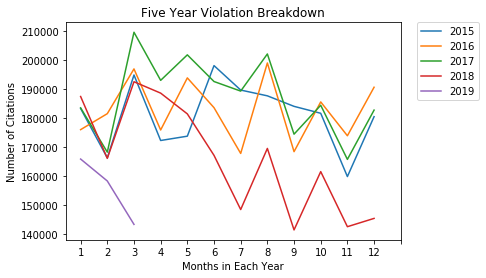

In [9]:
chart_2015.plot(label='2015')
chart_2016.plot(label='2016')
chart_2017.plot(label='2017')
chart_2018.plot(label='2018')
chart_2019.plot(label='2019')

plt.title("Five Year Violation Breakdown")
plt.xlabel("Months in Each Year")
plt.ylabel("Number of Citations")

myticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x = np.arange(0, len(myticks)+1)
#plt.xticks(np.arange(0, 12, step=1))
plt.xticks(x, myticks)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#plt.savefig("Output","FiveYear.png")

plt.show()